In [2]:
import os
os.getcwd()

'/media/amritesh/bytesviewhdd1/ai_stuf/netomi/Netomi-Customer-Service-Optimization/src'

In [3]:
os.chdir('..')

In [4]:
import pandas as pd


queries_df = pd.read_csv('data/SkyRocket Data_GenAI - Queries.csv')
responses_df = pd.read_csv('data/SkyRocket Data_GenAI - GenAI_responses.csv')

In [8]:
print("--- Queries DataFrame Info ---")
print(queries_df.info())
print("\n--- Queries DataFrame Head ---")
print(queries_df.head())

# Display info and head for GenAI Responses
print("\n\n--- GenAI Responses DataFrame Info ---")
print(responses_df.info())
print("\n--- GenAI Responses DataFrame Head ---")
print(responses_df.head())

--- Queries DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Queries  6539 non-null   object
dtypes: object(1)
memory usage: 51.2+ KB
None

--- Queries DataFrame Head ---
                                             Queries
0       acn ya help me creating a new online account
1                         add some items to an order
2                       adding product to last order
3                            allowed payment options
4  am I entitled to a refund according to your po...


--- GenAI Responses DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   flags         470 non-null    object
 1   Query         470 non-null    object
 2   category      470 non-null    object
 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re

sns.set_theme(style="whitegrid")

# --- 1. Analyze GenAI_responses.csv (Labeled Data) ---

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Main category distribution
sns.countplot(
    y='category',
    hue='category',
    data=responses_df,
    order=responses_df['category'].value_counts().index,
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Distribution of Main Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Category')

# Top 20 sub-categories
top_sub_categories = responses_df['Sub Category'].value_counts().head(20).index
sns.countplot(
    y='Sub Category',
    hue='Sub Category',
    data=responses_df[responses_df['Sub Category'].isin(top_sub_categories)],
    order=top_sub_categories,
    palette='magma',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 20 Sub-Categories')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Sub Category')

plt.tight_layout()
plt.savefig('category_subcategory_distribution.png')


# --- 2. Analyze Queries.csv (Unlabeled Data) ---

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

queries_df['cleaned_queries'] = queries_df['Queries'].apply(clean_text)

def get_top_ngrams(corpus, n=None, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

top_bigrams = get_top_ngrams(queries_df['cleaned_queries'], n=2)
top_trigrams = get_top_ngrams(queries_df['cleaned_queries'], n=3)

bigram_df = pd.DataFrame(top_bigrams, columns=['Ngram', 'Frequency'])
trigram_df = pd.DataFrame(top_trigrams, columns=['Ngram', 'Frequency'])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bigrams
sns.barplot(
    x='Frequency',
    y='Ngram',
    hue='Ngram',
    data=bigram_df,
    palette='Blues_d',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 20 Bigrams')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigram')

# Trigrams
sns.barplot(
    x='Frequency',
    y='Ngram',
    hue='Ngram',
    data=trigram_df,
    palette='Purples_d',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 20 Trigrams')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Trigram')

plt.tight_layout()
plt.savefig('ngrams_distribution.png')

print("Bigrams Head:")
print(bigram_df.head())

print("\nTrigrams Head:")
print(trigram_df.head())


> Performed an NLP analysis (N-gram extraction) on the `Queries.csv` to see what customers are actually saying, and analyzed the distribution of the labeled `GenAI_responses.csv`.

**Key Insight 1:**     
*The "Shipping Address" Bottleneck*: As we can see in the charts above, "Shipping Address" is the single most dominant phrase. Customers are constantly asking to *"change"*, *"new"*, or use a *"different"* shipping address.
- **Business Value (ROI):** Automating "Address Update" queries will likely provide the highest immediate ROI.

**Key Insight 2:**     
*Top Trends (The "Topic Framework")*: From the *Bigrams* and *Trigrams*, we can already identify several of the "Top 10 Topics" required for Task 2:
- Update Shipping Address ("change shipping address", "new shipping address")
- General Support Handover ("contact customer service", "person please")
- Delivery Inquiries ("check delivery options")
- Order Cancellation (Heavily present in the labeled GenAI_responses data)

**Key Insight 3:**    
*Cancellation is Critical*: The GenAI_responses dataset shows that ORDER --> cancel_order is the most tested category. This suggests the business knows this is a pain point.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re

# 1. Load Data
# queries_df = pd.read_csv('SkyRocket Data_GenAI - Queries.csv')
# responses_df = pd.read_csv('SkyRocket Data_GenAI - GenAI_responses.csv')

# 2. Clean Text Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    return text

queries_df['cleaned_queries'] = queries_df['Queries'].apply(clean_text)

# 3. N-Gram Analysis (Finding the Topics)
def get_top_ngrams(corpus, n=None, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Get Top Bigrams (2 words) and Trigrams (3 words)
top_bigrams = get_top_ngrams(queries_df['cleaned_queries'], n=2, top_k=20)
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

top_trigrams = get_top_ngrams(queries_df['cleaned_queries'], n=3, top_k=20)
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# 4. Visualization
sns.set(style="whitegrid")

# Plot Bigrams
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='Blues_d')
plt.title('Top 20 Most Frequent Bigrams (Customer Trends)')
plt.show()

# Plot Trigrams
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='Purples_d')
plt.title('Top 20 Most Frequent Trigrams (Specific Intents)')
plt.show()

# Plot Existing Categories (from GenAI Responses)
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=responses_df, order=responses_df['category'].value_counts().index, palette='viridis')
plt.title('Distribution of Key Categories')
plt.show()

In [12]:
# We extract business-relevant flags from raw queries.

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

queries_df = pd.read_csv("data/SkyRocket Data_GenAI - Queries.csv")

# -------------------------------
# Text cleaning
# -------------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

queries_df["cleaned_query"] = queries_df["Queries"].apply(clean_text)

# -------------------------------
# Strategic keyword flags
# -------------------------------
queries_df["needs_help"] = queries_df["cleaned_query"].str.contains(
    r"\b(help|assist|dont know|problem|issue)\b"
)

queries_df["refund_related"] = queries_df["cleaned_query"].str.contains(
    r"\b(refund|money back|reimbursement|compensation)\b"
)

queries_df["delivery_related"] = queries_df["cleaned_query"].str.contains(
    r"\b(delivery|shipping|arrival|track|parcel)\b"
)

queries_df["account_related"] = queries_df["cleaned_query"].str.contains(
    r"\b(account|login|delete|edit|create)\b"
)

queries_df["order_related"] = queries_df["cleaned_query"].str.contains(
    r"\b(order|invoice|purchase)\b"
)

queries_df["profanity"] = queries_df["cleaned_query"].str.contains(
    r"\b(damn|fuck|shit)\b"
)


/tmp/ipykernel_255022/4253815300.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["needs_help"] = queries_df["cleaned_query"].str.contains(
/tmp/ipykernel_255022/4253815300.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["refund_related"] = queries_df["cleaned_query"].str.contains(
/tmp/ipykernel_255022/4253815300.py:29: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["delivery_related"] = queries_df["cleaned_query"].str.contains(
/tmp/ipykernel_255022/4253815300.py:33: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["account_related"] = queries_df["cleaned_query"].str.contains(
/tmp/ipyk

In [13]:
friction_summary = pd.DataFrame({
    "Metric": [
        "Queries asking for help",
        "Refund-related queries",
        "Delivery-related queries",
        "Account-related queries",
        "Order-related queries",
        "Emotionally charged queries"
    ],
    "Percentage": [
        queries_df["needs_help"].mean(),
        queries_df["refund_related"].mean(),
        queries_df["delivery_related"].mean(),
        queries_df["account_related"].mean(),
        queries_df["order_related"].mean(),
        queries_df["profanity"].mean()
    ]
})

friction_summary["Percentage"] = (friction_summary["Percentage"] * 100).round(2)
print(friction_summary)


                        Metric  Percentage
0      Queries asking for help       34.36
1       Refund-related queries        7.94
2     Delivery-related queries       15.23
3      Account-related queries       11.78
4        Order-related queries       15.12
5  Emotionally charged queries        0.28


In [15]:
automation_matrix = pd.DataFrame({
    "Intent Area": [
        "Delivery",
        "Account Management",
        "Orders",
        "Refunds"
    ],
    "Volume Share (%)": [
        queries_df["delivery_related"].mean() * 100,
        queries_df["account_related"].mean() * 100,
        queries_df["order_related"].mean() * 100,
        queries_df["refund_related"].mean() * 100
    ],
    "Deterministic": ["High", "High", "Medium", "Low"],
    "Policy Sensitive": ["Low", "Low", "Medium", "High"],
    "Automation Suitability": ["Very High", "Very High", "Medium", "Low"]
})

automation_matrix["Volume Share (%)"] = automation_matrix["Volume Share (%)"].round(2)
automation_matrix


,Intent Area,Volume Share (%),Deterministic,Policy Sensitive,Automation Suitability
0,Delivery,15.23,High,Low,Very High
1,Account Management,11.78,High,Low,Very High
2,Orders,15.12,Medium,Medium,Medium
3,Refunds,7.94,Low,High,Low


In [16]:
escalation_risk = queries_df[
    queries_df["refund_related"] | queries_df["profanity"]
]

print("Escalation Risk Share (%):",
      round(len(escalation_risk) / len(queries_df) * 100, 2))


Escalation Risk Share (%): 8.21


In [18]:
# -------------------------------
# TF-IDF vectorization
# -------------------------------
vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words="english"
)

X = vectorizer.fit_transform(queries_df["cleaned_query"])

# -------------------------------
# KMeans clustering
# -------------------------------
kmeans = KMeans(
    n_clusters=8,
    random_state=42,
    n_init=10
)

queries_df["cluster"] = kmeans.fit_predict(X)

# -------------------------------
# Top keywords per cluster
# -------------------------------
terms = vectorizer.get_feature_names_out()
cluster_keywords = {}

for i in range(8):
    center_terms = kmeans.cluster_centers_[i].argsort()[-8:][::-1]
    cluster_keywords[i] = [terms[idx] for idx in center_terms]

cluster_summary = pd.DataFrame({
    "Cluster": cluster_keywords.keys(),
    "Top Keywords": cluster_keywords.values(),
    "Volume": queries_df["cluster"].value_counts().sort_index().values
})

cluster_summary


,Cluster,Top Keywords,Volume
0,0,"[shipping, address, set, different, new, setti...",240
1,1,"[item, buy, arrive, items, help, know, check, ...",272
2,2,"[refund, check, delivery, options, status, hel...",809
3,3,"[order, track, cancel, help, change, canceling...",662
4,4,"[account, user, delete, switch, help, create, ...",768
5,5,"[help, invoices, invoice, need, know, assistan...",3203
6,6,"[payment, methods, report, issues, allowed, is...",410
7,7,"[address, shipping, change, changing, trying, ...",175


In [19]:
import pandas as pd
import numpy as np
import re

queries_df = pd.read_csv("data/SkyRocket Data_GenAI - Queries.csv")

# -------------------------------
# Clean text
# -------------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

queries_df["cleaned_query"] = queries_df["Queries"].apply(clean_text)

# -------------------------------
# Intent heuristics
# -------------------------------
queries_df["delivery_intent"] = queries_df["cleaned_query"].str.contains(
    r"\b(delivery|shipping|arrival|track|parcel)\b"
)

queries_df["account_intent"] = queries_df["cleaned_query"].str.contains(
    r"\b(account|login|delete|edit|create)\b"
)

queries_df["order_intent"] = queries_df["cleaned_query"].str.contains(
    r"\b(order|invoice|purchase)\b"
)

queries_df["refund_intent"] = queries_df["cleaned_query"].str.contains(
    r"\b(refund|reimbursement|money back|compensation)\b"
)

# -------------------------------
# Primary intent (single label)
# -------------------------------
def assign_primary_intent(row):
    if row["refund_intent"]:
        return "refund"
    if row["delivery_intent"]:
        return "delivery"
    if row["order_intent"]:
        return "order"
    if row["account_intent"]:
        return "account"
    return "other"

queries_df["primary_intent"] = queries_df.apply(assign_primary_intent, axis=1)

# -------------------------------
# Friction & escalation flags
# -------------------------------
queries_df["needs_help"] = queries_df["cleaned_query"].str.contains(
    r"\b(help|assist|dont know|problem|issue)\b"
)

queries_df["emotion_risk_flag"] = queries_df["cleaned_query"].str.contains(
    r"\b(damn|fuck|shit|angry)\b"
)

# -------------------------------
# Entity dependency
# -------------------------------
queries_df["requires_order_id"] = queries_df["primary_intent"].isin(
    ["delivery", "order", "refund"]
)

queries_df["missing_required_entity"] = (
    queries_df["requires_order_id"]
    & ~queries_df["cleaned_query"].str.contains(r"\b\d{5,}\b")
)

# -------------------------------
# Automation suitability score
# -------------------------------
def automation_score(row):
    if row["primary_intent"] in ["delivery", "account"]:
        return 0.9
    if row["primary_intent"] == "order":
        return 0.6
    if row["primary_intent"] == "refund":
        return 0.3
    return 0.2

queries_df["automation_suitability_score"] = queries_df.apply(
    automation_score, axis=1
)

queries_df["can_be_auto_resolved"] = (
    queries_df["automation_suitability_score"] >= 0.7
)

# -------------------------------
# Emerging topic signal (used later with clustering)
# -------------------------------
queries_df["is_candidate_for_clustering"] = (
    queries_df["primary_intent"] == "other"
)

# Save enriched dataset
queries_df.to_csv(
    "data/SkyRocket_Queries_Enriched.csv",
    index=False
)


/tmp/ipykernel_255022/3710654828.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["delivery_intent"] = queries_df["cleaned_query"].str.contains(
/tmp/ipykernel_255022/3710654828.py:24: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["account_intent"] = queries_df["cleaned_query"].str.contains(
/tmp/ipykernel_255022/3710654828.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["order_intent"] = queries_df["cleaned_query"].str.contains(
/tmp/ipykernel_255022/3710654828.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  queries_df["refund_intent"] = queries_df["cleaned_query"].str.contains(
/tmp/ipyke

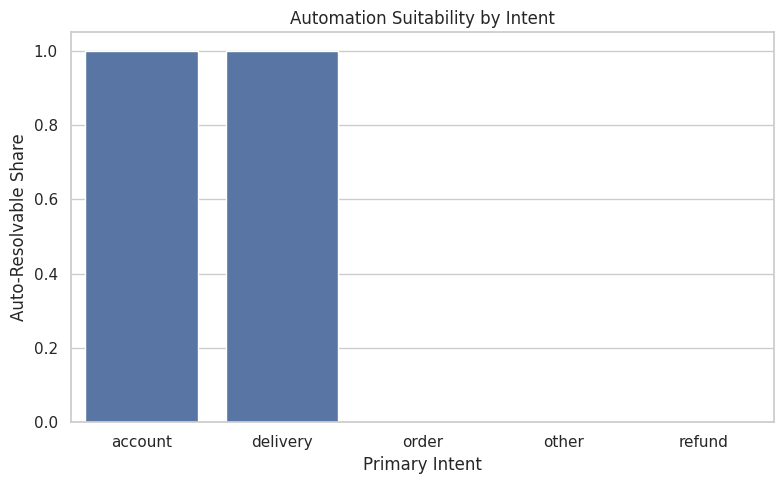

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

enriched_df = pd.read_csv("data/SkyRocket_Queries_Enriched.csv")

roi_df = (
    enriched_df.groupby("primary_intent")["can_be_auto_resolved"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=roi_df,
    x="primary_intent",
    y="can_be_auto_resolved"
)
plt.title("Automation Suitability by Intent")
plt.ylabel("Auto-Resolvable Share")
plt.xlabel("Primary Intent")
plt.tight_layout()
plt.savefig("automation_roi_by_intent.png")


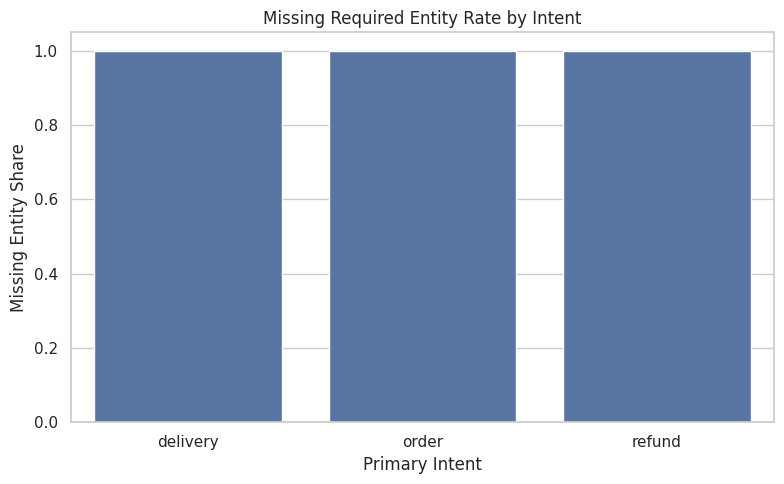

In [21]:
entity_gap = (
    enriched_df[enriched_df["requires_order_id"]]
    .groupby("primary_intent")["missing_required_entity"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=entity_gap,
    x="primary_intent",
    y="missing_required_entity"
)
plt.title("Missing Required Entity Rate by Intent")
plt.ylabel("Missing Entity Share")
plt.xlabel("Primary Intent")
plt.tight_layout()
plt.savefig("missing_entity_rate.png")


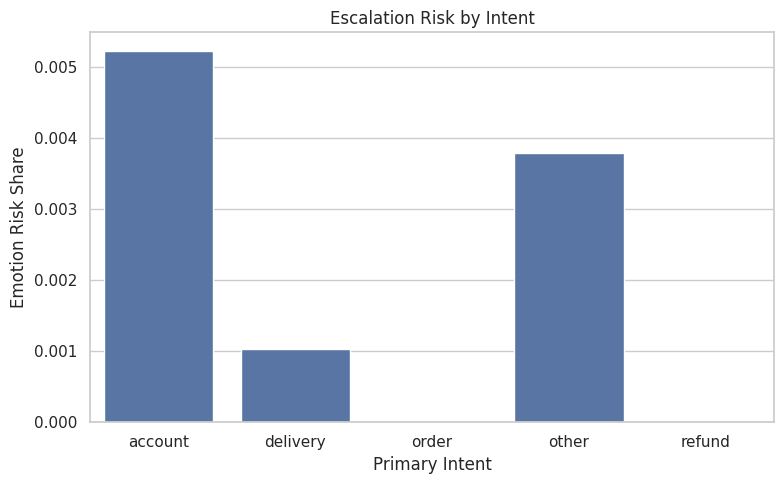

In [22]:
risk_df = (
    enriched_df.groupby("primary_intent")["emotion_risk_flag"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=risk_df,
    x="primary_intent",
    y="emotion_risk_flag"
)
plt.title("Escalation Risk by Intent")
plt.ylabel("Emotion Risk Share")
plt.xlabel("Primary Intent")
plt.tight_layout()
plt.savefig("escalation_risk_by_intent.png")


In [23]:
## Enriching Response

import pandas as pd
import re

responses_df = pd.read_csv(
    "data/SkyRocket Data_GenAI - GenAI_responses.csv"
)

# -------------------------------
# Basic response features
# -------------------------------
responses_df["response_length"] = responses_df["response"].astype(str).str.len()

responses_df["contains_placeholder"] = responses_df["response"].astype(str).str.contains(
    r"\{\{.*?\}\}", regex=True
)

responses_df["has_stepwise_guidance"] = responses_df["response"].astype(str).str.contains(
    r"\n\s*\d+\.", regex=True
)

responses_df["asks_for_entity"] = responses_df["response"].astype(str).str.contains(
    r"(please provide|share your|could you provide|need your)",
    case=False,
    regex=True
)

responses_df["empathy_signal"] = responses_df["response"].astype(str).str.contains(
    r"(sorry|apolog|understand|i know this can be)",
    case=False,
    regex=True
)

# -------------------------------
# Policy sensitivity (refunds etc.)
# -------------------------------
responses_df["policy_sensitive"] = responses_df["Sub Category"].isin(
    ["get_refund", "change_order"]
)

# -------------------------------
# Aggregate response quality risk
# -------------------------------
responses_df["response_quality_risk"] = (
    responses_df["contains_placeholder"]
    | (responses_df["policy_sensitive"] & ~responses_df["asks_for_entity"])
)

# Save enriched responses
responses_df.to_csv(
    "data/SkyRocket_GenAI_Responses_Enriched.csv",
    index=False
)


/tmp/ipykernel_255022/206133147.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  responses_df["asks_for_entity"] = responses_df["response"].astype(str).str.contains(
/tmp/ipykernel_255022/206133147.py:29: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  responses_df["empathy_signal"] = responses_df["response"].astype(str).str.contains(
